<a href="https://colab.research.google.com/github/shlok-py/fox_news_Data_analysis_web_scraping/blob/main/web_scraping_and_data_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this program "*web_Scraping_and_data_anal.py*" I scraped out some key data from foxnews.com and did data analysis on its news, sentimental analysis, frequency analysis and many more.
Now, let's begin this.

# STEP 1. Importing Dependencies


In [1]:
from bs4 import BeautifulSoup
import requests

## 1.2 Giving the static URL 
And using request response to get the html

In [2]:
url = "https://www.foxnews.com/"
response = requests.get(url).text

## 1.3 Parsing response using html.parser

In [3]:
soup = BeautifulSoup(response, 'html.parser')

## 1.4 checking if the code works using soup.title

In [4]:
soup.title

<title>Fox News - Breaking News Updates | Latest News Headlines | Photos &amp; News Videos</title>

#STEP 2. Scrape the title from the homepage from foxnews.com

In [ ]:
#scrape the title
titles = soup.find_all('h3', class_= 'title')
news_titles = []
for title in titles:
    anchor_tag = title.find('a')
    if anchor_tag == None:
      news_titles.append(None)
      continue
    print(anchor_tag.text.strip())
    news_titles.append(anchor_tag.text.strip())

#STEP 3. Scrape the URL from the homepage from foxnews.com

In [ ]:
#scrpe the url
urls = []
for link in titles:
  url = link.find('a')
  if url == None:
    urls.append(None)
    continue
  urls.append(url['href'])
for i in range(len(urls)):
  if urls[i]!=None:
    if not urls[i].startswith('https:'):
      urls[i] = 'https:' + urls[i]
urls

# STEP 4: Scrape the news Corpus

In [ ]:
#scrape the news corpus
art_text = []
for url in urls:
  try:
    response = requests.get(url).text
    f_texts = BeautifulSoup(response, 'html.parser')
    main_text = f_texts.find('div', class_='article-body')
    if main_text == None:
      art_text.append(None)
      continue
    article_text = main_text.get_text()
    print(article_text.strip())
    art_text.append(article_text.strip())
  except requests.exceptions.RequestException as e:
    # Handle the exception (e.g. log an error message, skip the URL, etc.)
    print(f'Error while requesting {url}: {e}')
    art_text.append(None)
    continue
len(art_text)

# STEP 5: Scrape the news category

In [ ]:
#find the news category
from urllib.parse import urlparse
news_cat = []
for url in urls:
  url_parts = urlparse(url)
  print(url)
  if url == None:
    news_cat.append(None)
    continue
  path_parts = url_parts.path.split('/')
  category = path_parts[1] if len(path_parts) > 1 else ' '
  news_cat.append(category)

# STEP 6: Scrape Authors Name

In [9]:
#scraping the authors
author_names = []
for url in urls:
  if url == None:
    author_names.append(None)
    continue
  response = requests.get(url)

  soup = BeautifulSoup(response.text, 'html.parser')

  # Find the element containing the author name
  author_element = soup.find('a', class_='author-byline')
  if author_element:
      # Extract the author name from the element
      author_name = author_element.text.strip()
      author_names.append(author_name)
  else:
      # If the author element is not found, set the author name to an empty string
      author_name = ''
      author_names.append(author_name)

# STEP 7: Scrape date and time

In [30]:
# Scrape the time and date
time = []
for url in urls:
  if url == None:
    time.append(None)
    continue
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  news_dates = soup.find('time')
  if news_dates == None:
    time.append(None)
    continue
  time.append(news_dates.get_text())
print(time)


[' March 19, 2023 9:59pm EDT', ' March 19, 2023 8:50pm EDT', ' March 19, 2023 6:16pm EDT', ' March 19, 2023 7:58pm EDT', ' March 19, 2023 8:04pm EDT', ' March 19, 2023 5:18pm EDT', ' March 19, 2023 3:45pm EDT', ' March 19, 2023 2:58pm EDT', ' March 20, 2023 12:03am EDT', ' March 19, 2023 3:54pm EDT', None, None, None, ' March 19, 2023 7:34pm EDT', ' March 19, 2023 4:56pm EDT', ' March 19, 2023 10:42am EDT', ' March 19, 2023 3:44pm EDT', ' March 19, 2023 4:00pm EDT', 'Published March 19, 2023 4:38pm EDT\n        ', ' March 19, 2023 8:08pm EDT', ' March 19, 2023 12:46pm EDT', ' March 19, 2023 2:47pm EDT', ' March 19, 2023 10:28pm EDT', ' March 19, 2023 9:35pm EDT', ' March 19, 2023 9:55pm EDT', ' March 19, 2023 11:49pm EDT', 'Published March 19, 2023 11:26am EDT\n        ', ' March 19, 2023 9:50pm EDT', ' March 19, 2023 5:17pm EDT', ' March 19, 2023 9:44pm EDT', ' March 19, 2023 4:22pm EDT', ' March 19, 2023 2:54pm EDT', ' March 19, 2023 9:11pm EDT', ' March 19, 2023 11:44am EDT', 'March

# STEP 8: Convert everything into pandas DataFrame

In [11]:
import pandas as pd
news_data = pd.DataFrame({
    "Title": news_titles,
    "Link": urls,
    "Corpus": art_text,
    "category": news_cat,
    "author": author_names,
    "timeanddate": time,
})
news_data.dropna(how='any', inplace=True)

# STEP 9: Sentimental Analysis
### download nltk dependencies

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 9.1 Remove Stopwords and uneccessary words from the corpus

In [134]:
# setting up stopwords with some additional stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['close', 2, ':', 3, 'video', 'fox news', 'flash', 'top', 'headlines', ".", ",", "news", "fox","?", ";", "(", ")", "-", "!", "@", "#","$","%","^","&","*", "also", "march", "get", "one", "``", "'", "said", "new", "two", "'s", 'would', "n't", 'first', '~', '’', '‘', 'told', 'images','according', 'years', 'like'])

# Define function to remove stop words
def remove_stopwords(text):
    if text != None:
      tokens = word_tokenize(text.lower())
      filtered_tokens = [word for word in tokens if word not in stop_words]
      return ' '.join(filtered_tokens)

# Apply function to 'corpus' column
news_data['Corpus'] = news_data['Corpus'].apply(remove_stopwords)

### See the new Corpus

In [135]:
news_data["Corpus"]

0      watch security footage appears show mexican mi...
1      north korean defectors honor otto warmbier kim...
2      nfl uncharted waters following damar hamlin co...
3      objective parent knows children belong drag sh...
4      kilmeade biden admin perfects blame game host ...
                             ...                        
144    good samaritan helped stop gym attacker good s...
149    15 check clicking foxnews.com.a 208 million mu...
150    15 check clicking foxnews.com.as smallest grou...
151    turkey earthquake captured dashcam dashcam cap...
152    15 check clicking foxnews.com.in front empty d...
Name: Corpus, Length: 142, dtype: object

## 9.2 Sentiment Analysis
### Positive Negative or Neutral
### Doing sentiment analysis of news corpus and keeping the analysis report in a new column ***news_data['sentiment']***

In [136]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'
news_data['sentiment'] = news_data['Corpus'].apply(get_sentiment)

#### Visualising dataframe

In [137]:
news_data.head()

,Title,Link,Corpus,category,author,timeanddate,sentiment
0,"US company outraged after Mexican military, po...",https://www.foxnews.com/politics/american-comp...,watch security footage appears show mexican mi...,politics,,"March 19, 2023 9:59pm EDT",negative
1,Dictator Kim Jong Un calls on North Korean mil...,https://www.foxnews.com/world/north-koreas-kim...,north korean defectors honor otto warmbier kim...,world,,"March 19, 2023 8:50pm EDT",positive
2,Terrifying clip of meteorologist collapsing on...,https://www.foxnews.com/media/terrifying-clip-...,nfl uncharted waters following damar hamlin co...,media,,"March 19, 2023 6:16pm EDT",positive
3,Blue state's attorney general hosts city's fir...,https://www.foxnews.com/media/new-york-ag-leti...,objective parent knows children belong drag sh...,media,,"March 19, 2023 7:58pm EDT",positive
4,Twitter users don’t let Biden get away with du...,https://www.foxnews.com/politics/bidens-twitte...,kilmeade biden admin perfects blame game host ...,politics,,"March 19, 2023 8:04pm EDT",positive


In [138]:
news_data.tail()

,Title,Link,Corpus,category,author,timeanddate,sentiment
144,Hatchet-wielding attacker subdued during wild ...,https://www.foxnews.com/media/hatchet-wielding...,good samaritan helped stop gym attacker good s...,media,,"March 17, 2023 1:15pm EDT",positive
149,Grand Canyon National Park planning for a $208...,https://www.foxnews.com/us/grand-canyon-nation...,15 check clicking foxnews.com.a 208 million mu...,us,,"March 19, 2023 9:00am EDT",positive
150,"Only big whales can lunge-feed successfully, a...",https://www.foxnews.com/science/only-big-whale...,15 check clicking foxnews.com.as smallest grou...,science,,"March 19, 2023 8:00am EDT",positive
151,Strong earthquake kills at least 14 in Ecuador...,https://www.foxnews.com/world/strong-earthquak...,turkey earthquake captured dashcam dashcam cap...,world,,"March 18, 2023 9:59pm EDT",negative
152,London partygoers rave to AI-generated beats i...,https://www.foxnews.com/entertainment/london-p...,15 check clicking foxnews.com.in front empty d...,entertainment,,"March 18, 2023 2:00pm EDT",positive


# STEP 10: Visualising news volume w.r.t categories

---


## Visualize on the basis of news category. For eg: Politics, Science

In [219]:
category_counts = news_data['category'].value_counts()
print(category_counts)

us                  27
entertainment       16
politics            14
media               12
world               12
lifestyle           11
opinion             10
sports               9
health               8
food-drink           4
tech                 4
personal-finance     3
weather-news         2
economy              2
markets              2
technology           1
auto                 1
retail               1
learn                1
extreme-weather      1
science              1
Name: category, dtype: int64


### Plotting the news volume with respect to its category

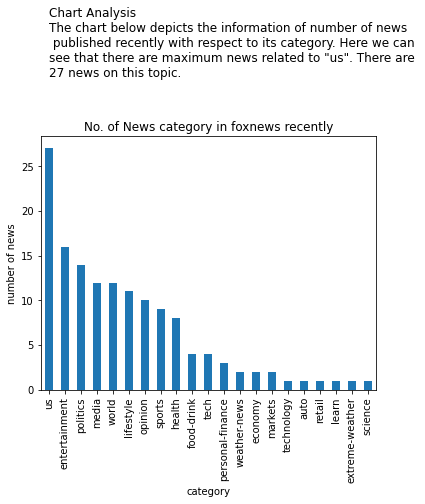

In [232]:
import matplotlib.pyplot as plt
category_counts.plot(kind='bar')
plt.title("No. of News category in foxnews recently")
plt.xlabel("category")
plt.ylabel("number of news")
desc = f'Chart Analysis \nThe chart below depicts the information of number of news\n published recently with respect to its category. Here we can \nsee that there are maximum news related to "{category_counts[category_counts == max(category_counts.values)].index[0]}". There are \n{max(category_counts.values)} news on this topic.'
plt.text(0,35, desc, ha='left', va='baseline', fontsize = "large")
plt.subplots_adjust(bottom=0)
plt.show()

# Sentiment Analysis (Visualization)

---



In [180]:
sentiment_counts = news_data['sentiment'].value_counts()
print(type(sentiment_counts))

<class 'pandas.core.series.Series'>


## Pie Chart Analysis

---


### The pie chart below shows that more of **positive** news have been published than **negative** news recently in *foxnews.com*.

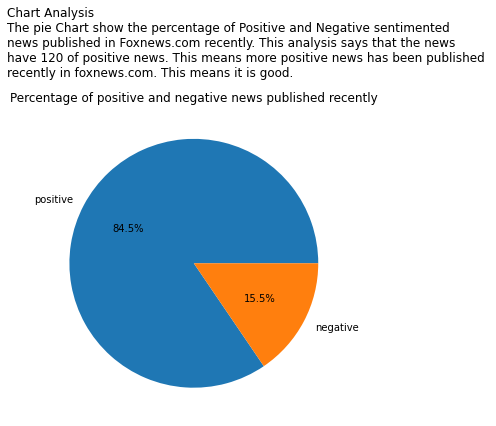

In [214]:
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Percentage of positive and negative news published recently")
desc = f'Chart Analysis \nThe pie Chart show the percentage of Positive and Negative sentimented \nnews published in Foxnews.com recently. This analysis says that the news \nhave {max(sentiment_counts.values)} of {sentiment_counts[sentiment_counts == max(sentiment_counts.values)].index[0]} news. This means more {sentiment_counts[sentiment_counts == max(sentiment_counts.values)].index[0]} news has been published \nrecently in foxnews.com. This means it is {"good" if sentiment_counts[sentiment_counts == max(sentiment_counts.values)].index[0] == "positive" else "bad"}.'
plt.text(-1.5,1.5, desc, ha='left', va='baseline', fontsize = "large")
plt.subplots_adjust(bottom=-0.2)
plt.show()

# Sentiment + news category Volume Relation

---


### Lets analyse which category is likely to have more positive or negative news recently

In [ ]:
# grouping the data w.r.t category and sentiment and resetting the index
category_counts = news_data.groupby(['category', 'sentiment']).size().reset_index(name = 'count')
print(category_counts)

In [148]:
# pivoting the table of category_counts and making category and index and sentiment as column values
'''
for eg.
Sentiments    |   Positive   |  Negative   |
Category      |              |             |
--------------------------------------------
US            |      20      |    7        |
Entertainment |      16      |    Nan      |
......        | ............ |............ |
'''

pivot_table = category_counts.pivot(index='category', columns='sentiment', values='count')

### Plotting the chart that shows the sentiments of categorical news

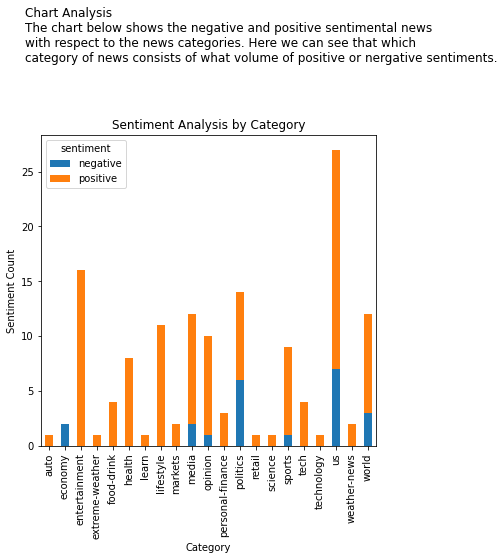

In [212]:
pivot_table.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Analysis by Category')
desc = f'Chart Analysis \nThe chart below shows the negative and positive sentimental news \nwith respect to the news categories. Here we can see that which \ncategory of news consists of what volume of positive or nergative sentiments.'
plt.text(-1.5,35, desc, ha='left', va='baseline', fontsize = "large")
plt.subplots_adjust(bottom=-0.2)
plt.show()

# Finding most repeated words
#### Import dependencies for frequency

In [130]:
from nltk.probability import FreqDist

### Merging the Corpus of all news and its title into one string, tokenizing and using FreqDist to find the most used words in the news publishes recently

In [150]:
corpus = " ".join(news_data['Title']) + " ".join(news_data['Corpus'])
tokenized_words = word_tokenize(corpus)
frequency = FreqDist(tokenized_words)
sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
top_words = [word[0] for word in sorted_frequency[:10]]

### Getting the frequency corresponding to *top_words*.

In [153]:
top_freq = [word[1] for word in sorted_frequency[:10]]

### Plotting the chart of Most Frequent Words used in News Corpus

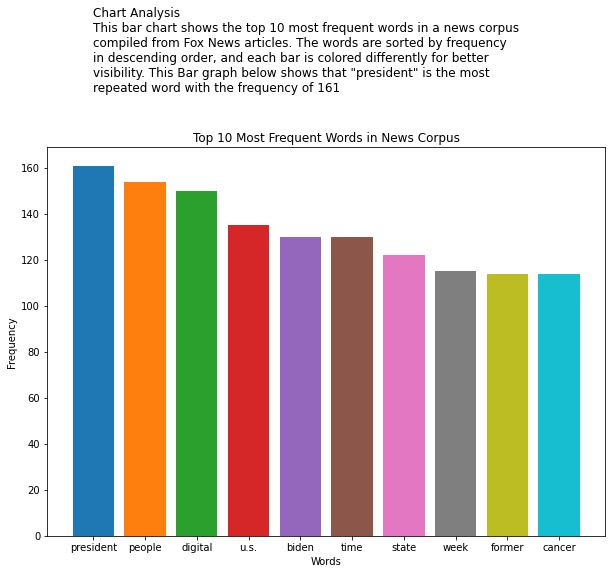

In [213]:
plt.figure(figsize=(10, 5))
colors = plt.cm.tab10(range(len(top_words)))
plt.bar(top_words, top_freq, color = colors)
plt.title('Top 10 Most Frequent Words in News Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
desc = f'Chart Analysis \nThis bar chart shows the top 10 most frequent words in a news corpus\ncompiled from Fox News articles. The words are sorted by frequency\nin descending order, and each bar is colored differently for better\nvisibility. This Bar graph below shows that "{top_words[0]}" is the most \nrepeated word with the frequency of {top_freq[0]}'
plt.text(0, max(top_freq) + 50, desc, ha='left', va='center', fontsize = "large")
plt.subplots_adjust(bottom=-0.2)
plt.show()

# Saving the DataFrame into a CSV File

In [93]:
news_data.to_csv('fox_news.csv', index = 'False')